In [9]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
print(torch.__version__)
print(torch.xpu.is_available())
print(torch.xpu.device_count())
print(torch.xpu.current_device())
print(torch.xpu.get_device_name(0))
print(torch.xpu.get_device_properties(0))
print(torch.xpu.get_device_capability(0))
print(
    torch.xpu.get_device_properties(0).total_memory / (1024**3)
)  # Convert bytes to GB

2.7.1+xpu
True
1
0
Intel(R) Arc(TM) Graphics
_XpuDeviceProperties(name='Intel(R) Arc(TM) Graphics', platform_name='Intel(R) oneAPI Unified Runtime over Level-Zero', type='gpu', driver_version='1.6.33890', total_memory=16832MB, max_compute_units=64, gpu_eu_count=64, gpu_subslice_count=8, max_work_group_size=1024, max_num_sub_groups=64, sub_group_sizes=[16 32], has_fp16=1, has_fp64=1, has_atomic64=1)
{'architecture': 21491614720, 'driver_version': '1.6.33890', 'gpu_eu_count': 64, 'gpu_subslice_count': 8, 'has_atomic64': True, 'has_bfloat16_conversions': False, 'has_fp16': True, 'has_fp64': True, 'has_subgroup_2d_block_io': False, 'has_subgroup_matrix_multiply_accumulate': False, 'has_subgroup_matrix_multiply_accumulate_tensor_float32': False, 'max_compute_units': 64, 'max_num_sub_groups': 64, 'max_work_group_size': 1024, 'name': 'Intel(R) Arc(TM) Graphics', 'platform_name': 'Intel(R) oneAPI Unified Runtime over Level-Zero', 'sub_group_sizes': [16, 32], 'total_memory': 17650577408, 'type'

In [6]:
x = torch.tensor(5.0)
y = 3 * x + 2
print(y)

tensor(17.)


In [7]:
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x + 2

y.backward()
print(x.grad)

tensor(3.)


$$\begin{align}
y &= 100(x_1 - x_0^2)^2 + (x_0 - 1)^2 \\
\\
\frac{\partial y}{\partial x_0} &= 400x_0^3 - 400x_0x_1 + 2x_0 - 2 = 0 \\
\frac{\partial y}{\partial x_1} &= 200x_1 - 200x_0^2 = 0
\end{align}$$

$$
(x_0, x_1) = (1, 1)
$$

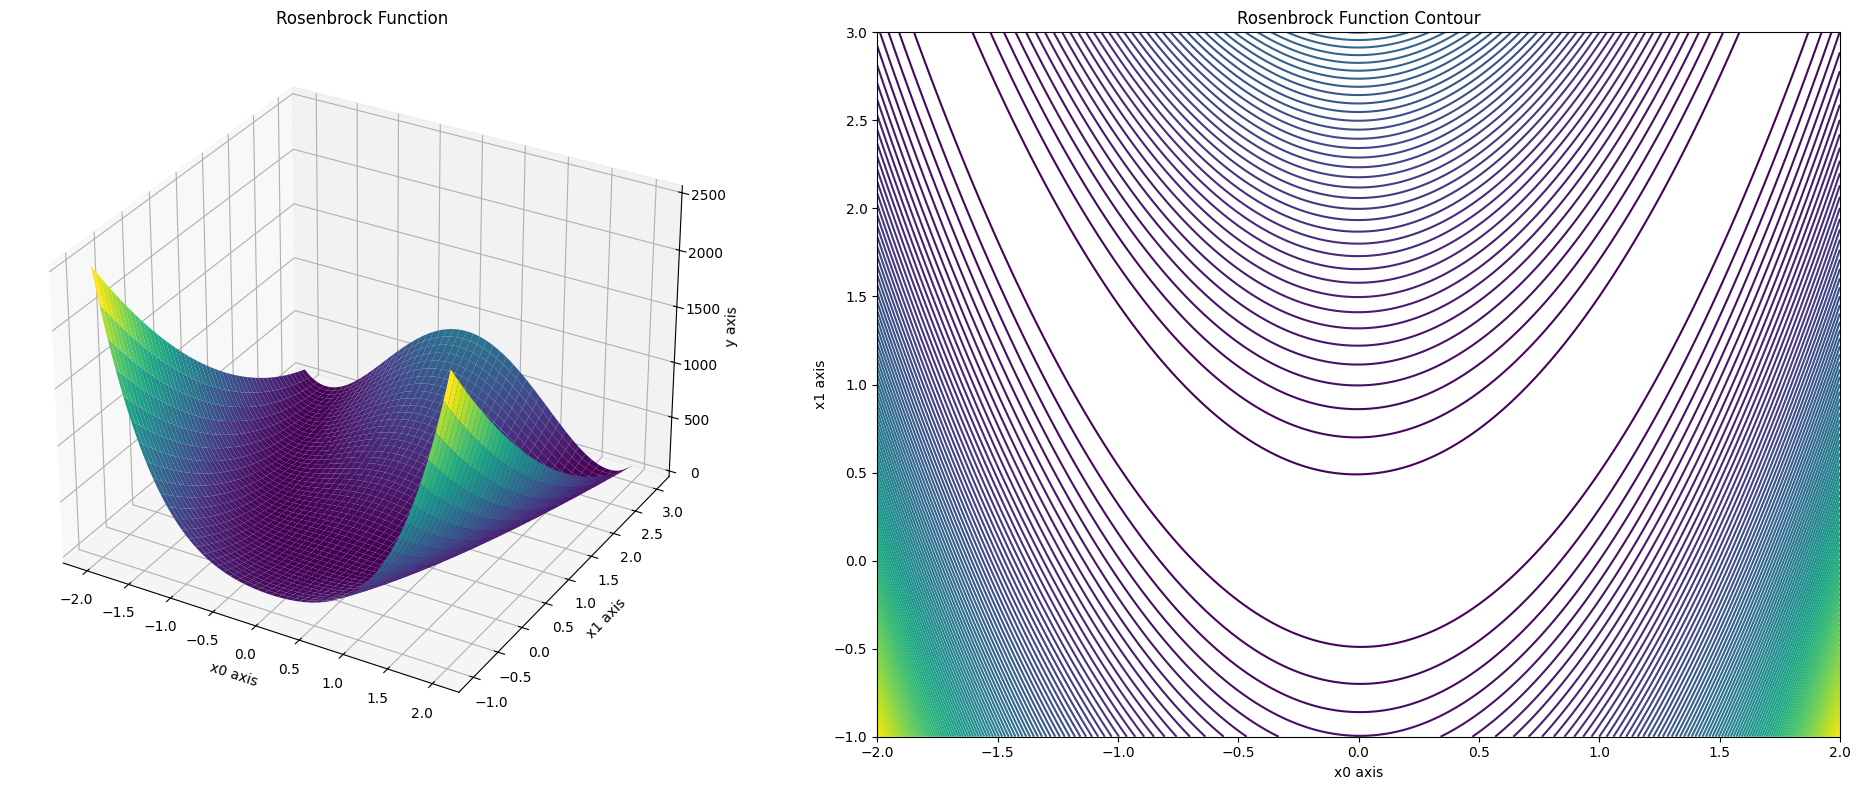

In [30]:
# y = 100(x_1 - x_0^2)^2 + (x_0 - 1)^2
x0, x1 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-1, 3, 500))
y = 100 * (x1 - x0**2) ** 2 + (x0 - 1) ** 2

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(x0, x1, y, cmap="viridis")
ax.set_xlabel("x0 axis")
ax.set_ylabel("x1 axis")
ax.set_zlabel("y axis")
ax.set_title("Rosenbrock Function")

ax2 = fig.add_subplot(122)
ax2.contour(x0, x1, y, levels=100, cmap="viridis")
ax2.set_xlabel("x0 axis")
ax2.set_ylabel("x1 axis")
ax2.set_title("Rosenbrock Function Contour")

plt.tight_layout()
plt.show()

In [22]:
def rosenbrock(x0: torch.Tensor, x1: torch.Tensor) -> torch.Tensor:
    y = 100 * (x1 - x0**2) ** 2 + (x0 - 1) ** 2

    return y


x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(f"x0: {x0.item()}, x1: {x1.item()}")
print(f"y: {y.item()}")
print(f"grad x0: {x0.grad}, grad x1: {x1.grad}")

x0: 0.0, x1: 2.0
y: 401.0
grad x0: -2.0, grad x1: 400.0


In [32]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

iters = 10000
lr = 0.001

for i in range(iters):
    if i % 1000 == 0:
        print(f"Iteration {i}, x0: {x0.item()}, x1: {x1.item()}")

    y = rosenbrock(x0, x1)

    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    x0.grad.zero_()
    x1.grad.zero_()

print(f"x0: {x0.item()}, x1: {x1.item()}")

Iteration 0, x0: 0.0, x1: 2.0
Iteration 1000, x0: 0.6837119460105896, x1: 0.4659528136253357
Iteration 2000, x0: 0.8263181447982788, x1: 0.6820318102836609
Iteration 3000, x0: 0.8947840929031372, x1: 0.8001903295516968
Iteration 4000, x0: 0.9334872364997864, x1: 0.8711214661598206
Iteration 5000, x0: 0.9569892883300781, x1: 0.9156519174575806
Iteration 6000, x0: 0.9718162417411804, x1: 0.9443121552467346
Iteration 7000, x0: 0.9813804626464844, x1: 0.9630323052406311
Iteration 8000, x0: 0.98763507604599, x1: 0.9753732085227966
Iteration 9000, x0: 0.9917610883712769, x1: 0.983556866645813
x0: 0.9944981336593628, x1: 0.9890044331550598


In [33]:
torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

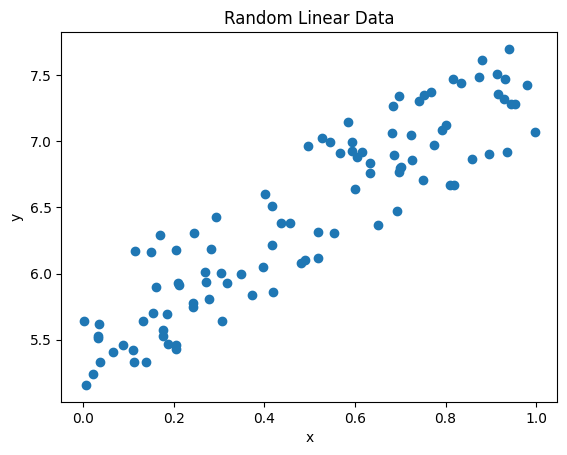

In [34]:
plt.scatter(x.numpy(), y.numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Linear Data")
plt.show()

In [37]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros((1,), requires_grad=True)


def predict(x: torch.Tensor) -> torch.Tensor:
    return x @ W + b


def loss_fn(x0: torch.Tensor, x1: torch.Tensor) -> torch.Tensor:
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff**2) / N


lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    # loss = loss_fn(y_hat, y)
    loss = F.mse_loss(y_hat, y)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}, W: {W.item()}, b: {b.item()}")

print(f"Final W: {W.item()}, b: {b.item()}")
print(f"Final Loss: {loss_fn(predict(x), y).item()}")

Iteration 0, Loss: 41.89796447753906, W: 0.665682315826416, b: 1.2871865034103394
Iteration 10, Loss: 0.22483211755752563, W: 2.493596076965332, b: 4.935605525970459
Iteration 20, Loss: 0.0925208106637001, W: 2.5405941009521484, b: 5.166225433349609
Iteration 30, Loss: 0.0888015553355217, W: 2.495894193649292, b: 5.203803539276123
Iteration 40, Loss: 0.08627457916736603, W: 2.452197551727295, b: 5.227496147155762
Iteration 50, Loss: 0.08435674756765366, W: 2.413858413696289, b: 5.2476396560668945
Iteration 60, Loss: 0.0829005315899849, W: 2.3804357051849365, b: 5.265163898468018
Iteration 70, Loss: 0.0817948430776596, W: 2.351311445236206, b: 5.28043270111084
Iteration 80, Loss: 0.08095530420541763, W: 2.3259332180023193, b: 5.293737888336182
Iteration 90, Loss: 0.08031783998012543, W: 2.303818941116333, b: 5.305331707000732
Final W: 2.2863590717315674, b: 5.3144850730896
Final Loss: 0.07983382046222687


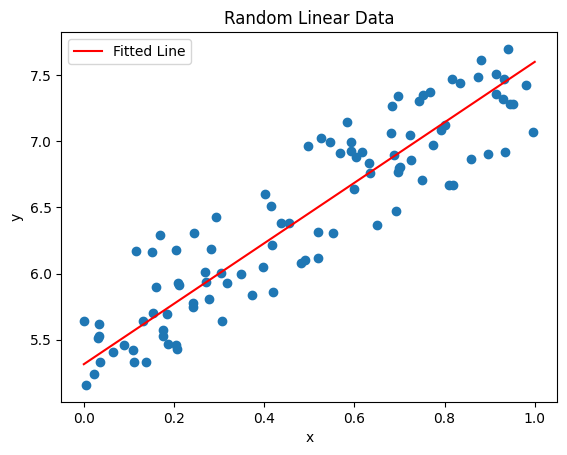

In [42]:
torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

x_hat = torch.linspace(0, 1, 100).view(-1, 1)
y_hat = W * x_hat + b

plt.scatter(x.numpy(), y.numpy())
plt.plot(x_hat.numpy(), y_hat.detach().numpy(), color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Linear Data")
plt.legend()
plt.show()

In [47]:
class Model(nn.Module):
    def __init__(self, input_size: int = 1, output_size: int = 1):
        super().__init__()
        # self.W = torch.nn.Parameter(torch.zeros((1, 1)))
        # self.b = torch.nn.Parameter(torch.zeros((1,)))
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # return x @ self.W + self.b
        return self.linear(x)


model = Model()

for param in model.parameters():
    print(param)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

lr = 0.1
iters = 100

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

print(f"Final W: {model.linear.weight.item()}, b: {model.linear.bias.item()}")
print(f"Final Loss: {loss_fn(model(x), y).item()}")

Parameter containing:
tensor([[-0.7559]], requires_grad=True)
Parameter containing:
tensor([-0.6865], requires_grad=True)
Iteration 0, Loss: 58.031070709228516
Iteration 10, Loss: 0.28428754210472107
Iteration 20, Loss: 0.09612414985895157
Iteration 30, Loss: 0.09427662938833237
Iteration 40, Loss: 0.09328816086053848
Iteration 50, Loss: 0.09250626713037491
Iteration 60, Loss: 0.09188652038574219
Iteration 70, Loss: 0.091395303606987
Iteration 80, Loss: 0.09100596606731415
Iteration 90, Loss: 0.09069733321666718
Final W: 2.0996222496032715, b: 5.510307312011719
Final Loss: 0.09045276045799255


$$
y=\sin(2\pi x)+\epsilon
$$

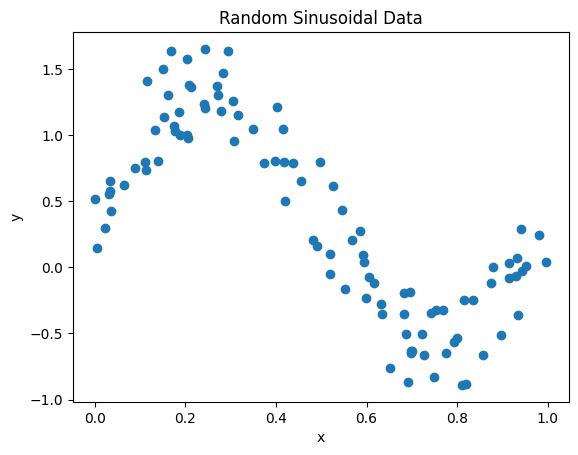

In [8]:
torch.manual_seed(0)
epsilon = 0.8
x = torch.rand(100, 1)
y = torch.sin(2 * np.pi * x) + torch.rand(100, 1) * epsilon

plt.scatter(x.numpy(), y.numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Sinusoidal Data")
plt.show()

In [12]:
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size=10, output_size=1):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        z = self.linear1(x)
        # z = F.relu(z)
        z = F.sigmoid(z)
        z = self.linear2(z)
        return z


lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_pred = model(x)

    loss = F.mse_loss(y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if i % 1000 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

print(f"Final Loss: {loss.item()}")

Iteration 0, Loss: 0.6775424480438232
Iteration 1000, Loss: 0.21574260294437408
Iteration 2000, Loss: 0.21101468801498413
Iteration 3000, Loss: 0.20197273790836334
Iteration 4000, Loss: 0.1840921938419342
Iteration 5000, Loss: 0.13539212942123413
Iteration 6000, Loss: 0.06746590882539749
Iteration 7000, Loss: 0.05566084384918213
Iteration 8000, Loss: 0.05479436740279198
Iteration 9000, Loss: 0.06529305130243301
Final Loss: 0.054093971848487854


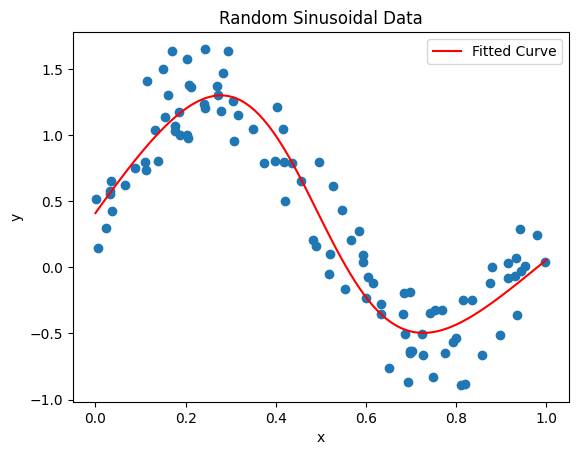

In [13]:
torch.manual_seed(0)
epsilon = 0.8
x = torch.rand(100, 1)
y = torch.sin(2 * np.pi * x) + torch.rand(100, 1) * epsilon

x_hat = torch.linspace(0, 1, 100).view(-1, 1)
y_hat = model(x_hat)

plt.scatter(x.numpy(), y.numpy())
plt.plot(x_hat.numpy(), y_hat.detach().numpy(), color="red", label="Fitted Curve")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Sinusoidal Data")
plt.legend()
plt.show()

In [6]:
dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
)

size: 60000
type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])
label: 5


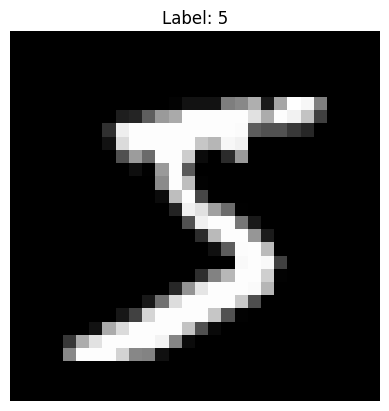

In [10]:
x, y = dataset[0]

print(f"size: {len(dataset)}")
print(f"type: {type(x)}")
print(f"shape: {x.shape}")
print(f"label: {y}")

image = x.squeeze().numpy()  # Remove the channel dimension
plt.imshow(image, cmap="gray")
plt.title(f"Label: {y}")
plt.axis("off")
plt.show()

In [12]:
data_loader = torch.utils.data.DataLoader(dataset, 32, shuffle=True)

for x, label in data_loader:
    print(f"Batch size: {x.shape[0]}")
    print(f"Image shape: {x.shape}")
    print(f"Label shape: {label.shape}")
    break

Batch size: 32
Image shape: torch.Size([32, 1, 28, 28])
Label shape: torch.Size([32])


In [ ]:
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
validation_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - validation_size

train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(
    dataset,
    [train_size, validation_size, test_size],
    generator=torch.Generator().manual_seed(0),
)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x